<a href="https://colab.research.google.com/github/poojamahajan0712/medium_blog/blob/master/tensors/Pytorch_transforms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torchvision
from torchvision import datasets, transforms  
import matplotlib.pyplot as plt
from torchvision import utils
import numpy as np
%matplotlib inline



1.  Loading MNIST data and calculating basic stats( mean and std)

In [ ]:
## loading train dataset for MNIST
train = datasets.FashionMNIST('./data', train=True, download=True)
print(type(train.data[0]))
# to access data use train.data 
train_data = train.data 
train_data=train_data.type(torch.DoubleTensor) # casting to double datatype

# basic stats
print(' - Tensor Shape:', train.data.size())
print(' - min:', torch.min(train_data))
print(' - max:', torch.max(train_data))
print(' - mean:', torch.mean(train_data))
print(' - std:', torch.std(train_data))

print('- norm- mean:', torch.mean(train_data)/255)  # mean value used in normalise function while loading mnist 
print('- norm- std:', torch.std(train_data)/255)    # std value used in normalise function while loading mnist


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw


Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw
Processing...
Done!
<class 'torch.Tensor'>
 - Tensor Shape: torch.Size([60000, 28, 28])
 - min: tensor(0., dtype=torch.float64)
 - max: tensor(255., dtype=torch.float64)
 - mean: tensor(72.9404, dtype=torch.float64)
 - std: tensor(90.0212, dtype=torch.float64)
- norm- mean: tensor(0.2860, dtype=torch.float64)
- norm- std: tensor(0.3530, dtype=torch.float64)


2. View images of MNIST data

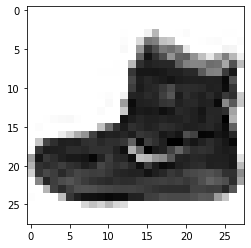

In [ ]:
plt.imshow(train.data[0], cmap='gray_r') 

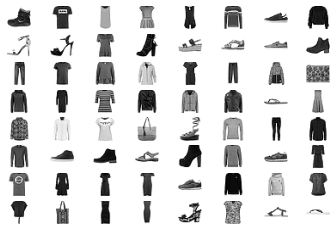

In [ ]:
# Viewing full batch
figure = plt.figure()
for index in range(0,64):
    plt.subplot(8,8, index+1)
    plt.axis('off')
    plt.imshow(train.data[index], cmap='gray_r')

In [ ]:
print(type(train.data[0]))

<class 'torch.Tensor'>


PyTorch modules dealing with image data require tensors to be laid out as C × H × W : channels, height, and width, respectively while for numpy H * W * C shape . Describing tensor shape as batch size * C × H × W

In [ ]:
# Understanding Data Loaders 

3. Understanding transform module of Pytorch 

We first start with defining our data transformations. We need to think what our data is and how can we augment it to correct represent images which it might not see otherwise.
That's why before appying any transformation , viewing data is important. 



<class 'PIL.Image.Image'>
(1, 28, 28)


Text(0.5, 1.0, 'transformed')

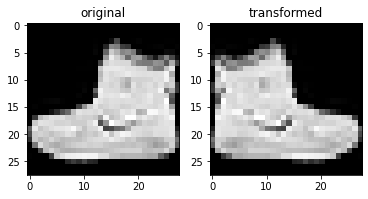

In [ ]:

# define transformations
data_transform = transforms.Compose([
        transforms.RandomHorizontalFlip(p=1),
        transforms.ToTensor(),
    ])


# get a sample image from training dataset
img = train[0][0]
print(type(img))

# transform sample image
img_tr=data_transform(img)

# convert tensor to numpy array
img_tr_np=img_tr.numpy()
print(img_tr_np.shape)

# show original and transformed images
plt.subplot(1,2,1)
plt.imshow(img,cmap="gray")
plt.title("original")

plt.subplot(1,2,2)
plt.imshow(img_tr_np.squeeze(),cmap="gray")
plt.title("transformed")


Text(0.5, 1.0, 'transformed')

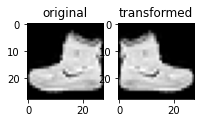

In [ ]:
fig = plt.figure(figsize=(3,3))
gs = fig.add_gridspec(1, 2)
fig.tight_layout()

ax1 = fig.add_subplot(gs[0, 0])
plt.imshow(img,cmap="gray")
plt.title("original")

ax2 = fig.add_subplot(gs[0,1])
plt.imshow(img_tr_np.squeeze(),cmap="gray")
plt.title("transformed")

<class 'PIL.Image.Image'>
(1, 28, 28)


Text(0.5, 1.0, 'transformed')

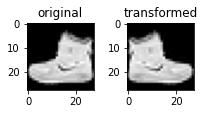

In [ ]:


# define transformations
data_transform = transforms.Compose([
        # transforms.Pad(10),
        transforms.RandomHorizontalFlip(p=1),
        #transforms.RandomRotation(degrees=(180)),
        #transforms.CenterCrop((18, 18)),
       #transforms.RandomVerticalFlip(p=0.5),
       #transforms.Resize((300, 300)),
       
       #transforms.RandomAffine(30, translate=None, scale=None, shear=None, resample=False, fillcolor=0),
       transforms.ToTensor(),
       #transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    ])


# get a sample image from training dataset
img = train[0][0]
print(type(img))

# transform sample image
img_tr=data_transform(img)

# convert tensor to numpy array
img_tr_np=img_tr.numpy()
print(img_tr_np.shape)

# show original and transformed images
fig = plt.figure(figsize=(3,3))
gs = fig.add_gridspec(1, 2)
plt.subplots_adjust(wspace=0.5)

ax1 = fig.add_subplot(gs[0, 0])
plt.imshow(img,cmap="gray")
plt.title("original")

ax2 = fig.add_subplot(gs[0,1])
plt.imshow(img_tr_np.squeeze(),cmap="gray")
plt.title("transformed")